In [1]:
import os, sys
sys.path.append(os.getcwd() + "/../../modules")
sys.path.append(os.getcwd() + "/../../external")
sys.path.append(os.getcwd() + "/../..")
sys.path.append(os.getcwd() + "/../dataset")

import dense_correspondence_manipulation.utils.utils as utils
utils.add_dense_correspondence_to_python_path()
from dense_correspondence.training.training import *
import sys
import logging
import time

# utils.set_default_cuda_visible_devices()
utils.set_cuda_visible_devices([0, 2]) # use this to manually set CUDA_VISIBLE_DEVICES

from dense_correspondence.training.training import DenseCorrespondenceTraining
from dense_correspondence.dataset.spartan_dataset_masked import SpartanDataset
from dense_correspondence.evaluation.evaluation import DenseCorrespondenceEvaluation
logging.basicConfig(level=logging.INFO)


setting CUDA_VISIBLE_DEVICES =  0,2,


## Load the configuration for training

In [2]:
dc_source_dir = utils.getDenseCorrespondenceSourceDir()

dataset_name = 'shirt_table'
config_filename = os.path.join(dc_source_dir, 'config/dense_correspondence/dataset/composite/%s.yaml' % dataset_name)
config = utils.getDictFromYamlFilename(config_filename)

train_config_file = os.path.join(dc_source_dir, 'config/dense_correspondence/training/training.yaml')
train_config = utils.getDictFromYamlFilename(train_config_file)

dataset = SpartanDataset(config=config)

logging_dir = os.path.join(dc_source_dir, "pdc/trained_models/tutorials")

# fixed params
loss_type = 'distributional'
normalize = True
lr = 1.0e-4
sigma = 1
net_type = 'resnet34'
symmetry = True
height, width = dataset.get_height_and_width()

# tunable params
num_iterations = 5000
d = 16

name = "%s_d%d_%s_%s" % (dataset_name, d, loss_type, 'sym' if symmetry else 'non_sym')
print("\nModel name:", name)

train_config["training"]["logging_dir_name"] = name
train_config["training"]["logging_dir"] = logging_dir
train_config["training"]["num_iterations"] = num_iterations
train_config["training"]["learning_rate"] = lr
train_config["dense_correspondence_network"]["descriptor_dimension"] = d
train_config["dense_correspondence_network"]["normalize"] = normalize
train_config["dense_correspondence_network"]["loss_type"] = loss_type
train_config["dense_correspondence_network"]["sigma"] = sigma
train_config["dense_correspondence_network"]["net_type"] = net_type
train_config["dense_correspondence_network"]["image_width"] = width
train_config["dense_correspondence_network"]["image_height"] = height
train_config["dense_correspondence_network"]["symmetry"] = symmetry

TRAIN = True
EVALUATE = True

INFO:root:Loading knots info for scene shirt_table


Using SpartanDataset:
   - in train mode
   - number of scenes 1
   - total images:     1500

Model name: shirt_table_d16_distributional_sym


## TRAIN

In [3]:
if TRAIN:
    start = time.time()
    print("training descriptor of dimension %d" %(d))
    train = DenseCorrespondenceTraining(dataset=dataset, config=train_config)
    train.run()
    print("finished training descriptor of dimension %d" %(d))
    print("training took %d seconds" %(time.time() - start))

INFO:root:enabling domain randomization
INFO:root:setting up tensorboard_logger
INFO:root:tensorboard logger started


training descriptor of dimension 16
using SINGLE_OBJECT_WITHIN_SCENE


INFO:root:Loading knots info for scene shirt_canonical
INFO:root:Loading knots info for scene shirt_canonical
INFO:root:Loading knots info for scene shirt_canonical
INFO:root:Loading knots info for scene shirt_canonical
INFO:root:Loading knots info for scene shirt_canonical
INFO:root:Training on iteration 10 of 5000
INFO:root:single iteration took 1.106 seconds
INFO:root:Training is 0 percent complete

INFO:root:Training on iteration 20 of 5000
INFO:root:single iteration took 1.048 seconds
INFO:root:Training is 0 percent complete

INFO:root:Training on iteration 30 of 5000
INFO:root:single iteration took 1.018 seconds
INFO:root:Training is 0 percent complete

INFO:root:Training on iteration 40 of 5000
INFO:root:single iteration took 1.011 seconds
INFO:root:Training is 0 percent complete

INFO:root:Training on iteration 50 of 5000
INFO:root:single iteration took 0.999 seconds
INFO:root:Training is 1 percent complete

INFO:root:Training on iteration 60 of 5000
INFO:root:single iteration 

INFO:root:Training on iteration 610 of 5000
INFO:root:single iteration took 1.068 seconds
INFO:root:Training is 12 percent complete

INFO:root:Training on iteration 620 of 5000
INFO:root:single iteration took 1.050 seconds
INFO:root:Training is 12 percent complete

INFO:root:Training on iteration 630 of 5000
INFO:root:single iteration took 1.053 seconds
INFO:root:Training is 12 percent complete

INFO:root:Training on iteration 640 of 5000
INFO:root:single iteration took 1.015 seconds
INFO:root:Training is 12 percent complete

INFO:root:Training on iteration 650 of 5000
INFO:root:single iteration took 1.051 seconds
INFO:root:Training is 13 percent complete

INFO:root:Training on iteration 660 of 5000
INFO:root:single iteration took 1.044 seconds
INFO:root:Training is 13 percent complete

INFO:root:Training on iteration 670 of 5000
INFO:root:single iteration took 1.021 seconds
INFO:root:Training is 13 percent complete

INFO:root:Training on iteration 680 of 5000
INFO:root:single iteratio

INFO:root:Training is 24 percent complete

INFO:root:Training on iteration 1230 of 5000
INFO:root:single iteration took 1.010 seconds
INFO:root:Training is 24 percent complete

INFO:root:Training on iteration 1240 of 5000
INFO:root:single iteration took 1.022 seconds
INFO:root:Training is 24 percent complete

INFO:root:Training on iteration 1250 of 5000
INFO:root:single iteration took 1.013 seconds
INFO:root:Training is 25 percent complete

INFO:root:Training on iteration 1260 of 5000
INFO:root:single iteration took 1.022 seconds
INFO:root:Training is 25 percent complete

INFO:root:Training on iteration 1270 of 5000
INFO:root:single iteration took 1.020 seconds
INFO:root:Training is 25 percent complete

INFO:root:Training on iteration 1280 of 5000
INFO:root:single iteration took 1.020 seconds
INFO:root:Training is 25 percent complete

INFO:root:Training on iteration 1290 of 5000
INFO:root:single iteration took 1.004 seconds
INFO:root:Training is 25 percent complete

INFO:root:Training 

INFO:root:Training on iteration 1820 of 5000
INFO:root:single iteration took 1.027 seconds
INFO:root:Training is 36 percent complete

INFO:root:Training on iteration 1830 of 5000
INFO:root:single iteration took 1.011 seconds
INFO:root:Training is 36 percent complete

INFO:root:Training on iteration 1840 of 5000
INFO:root:single iteration took 1.017 seconds
INFO:root:Training is 36 percent complete

INFO:root:Training on iteration 1850 of 5000
INFO:root:single iteration took 1.004 seconds
INFO:root:Training is 37 percent complete

INFO:root:Training on iteration 1860 of 5000
INFO:root:single iteration took 1.009 seconds
INFO:root:Training is 37 percent complete

INFO:root:Training on iteration 1870 of 5000
INFO:root:single iteration took 1.022 seconds
INFO:root:Training is 37 percent complete

INFO:root:Training on iteration 1880 of 5000
INFO:root:single iteration took 1.029 seconds
INFO:root:Training is 37 percent complete

INFO:root:Training on iteration 1890 of 5000
INFO:root:single 

INFO:root:single iteration took 1.036 seconds
INFO:root:Training is 48 percent complete

INFO:root:Training on iteration 2440 of 5000
INFO:root:single iteration took 1.030 seconds
INFO:root:Training is 48 percent complete

INFO:root:Training on iteration 2450 of 5000
INFO:root:single iteration took 1.040 seconds
INFO:root:Training is 49 percent complete

INFO:root:Training on iteration 2460 of 5000
INFO:root:single iteration took 1.022 seconds
INFO:root:Training is 49 percent complete

INFO:root:Training on iteration 2470 of 5000
INFO:root:single iteration took 1.017 seconds
INFO:root:Training is 49 percent complete

INFO:root:Training on iteration 2480 of 5000
INFO:root:single iteration took 1.045 seconds
INFO:root:Training is 49 percent complete

INFO:root:Training on iteration 2490 of 5000
INFO:root:single iteration took 1.050 seconds
INFO:root:Training is 49 percent complete

INFO:root:Training on iteration 2500 of 5000
INFO:root:single iteration took 1.043 seconds
INFO:root:Traini

INFO:root:Training is 60 percent complete

INFO:root:Training on iteration 3030 of 5000
INFO:root:single iteration took 1.034 seconds
INFO:root:Training is 60 percent complete

INFO:root:Training on iteration 3040 of 5000
INFO:root:single iteration took 1.002 seconds
INFO:root:Training is 60 percent complete

INFO:root:Training on iteration 3050 of 5000
INFO:root:single iteration took 1.031 seconds
INFO:root:Training is 61 percent complete

INFO:root:Training on iteration 3060 of 5000
INFO:root:single iteration took 1.022 seconds
INFO:root:Training is 61 percent complete

INFO:root:Training on iteration 3070 of 5000
INFO:root:single iteration took 1.046 seconds
INFO:root:Training is 61 percent complete

INFO:root:Training on iteration 3080 of 5000
INFO:root:single iteration took 1.010 seconds
INFO:root:Training is 61 percent complete

INFO:root:Training on iteration 3090 of 5000
INFO:root:single iteration took 1.022 seconds
INFO:root:Training is 61 percent complete

INFO:root:Training 

INFO:root:Training on iteration 3640 of 5000
INFO:root:single iteration took 1.032 seconds
INFO:root:Training is 72 percent complete

INFO:root:Training on iteration 3650 of 5000
INFO:root:single iteration took 1.016 seconds
INFO:root:Training is 73 percent complete

INFO:root:Training on iteration 3660 of 5000
INFO:root:single iteration took 1.010 seconds
INFO:root:Training is 73 percent complete

INFO:root:Training on iteration 3670 of 5000
INFO:root:single iteration took 1.024 seconds
INFO:root:Training is 73 percent complete

INFO:root:Training on iteration 3680 of 5000
INFO:root:single iteration took 1.013 seconds
INFO:root:Training is 73 percent complete

INFO:root:Training on iteration 3690 of 5000
INFO:root:single iteration took 1.009 seconds
INFO:root:Training is 73 percent complete

INFO:root:Training on iteration 3700 of 5000
INFO:root:single iteration took 1.036 seconds
INFO:root:Training is 74 percent complete

INFO:root:Training on iteration 3710 of 5000
INFO:root:single 

INFO:root:single iteration took 1.104 seconds
INFO:root:Training is 85 percent complete

INFO:root:Training on iteration 4260 of 5000
INFO:root:single iteration took 1.016 seconds
INFO:root:Training is 85 percent complete

INFO:root:Training on iteration 4270 of 5000
INFO:root:single iteration took 1.003 seconds
INFO:root:Training is 85 percent complete

INFO:root:Training on iteration 4280 of 5000
INFO:root:single iteration took 1.116 seconds
INFO:root:Training is 85 percent complete

INFO:root:Training on iteration 4290 of 5000
INFO:root:single iteration took 1.043 seconds
INFO:root:Training is 85 percent complete

INFO:root:Training on iteration 4300 of 5000
INFO:root:single iteration took 1.032 seconds
INFO:root:Training is 86 percent complete

INFO:root:Training on iteration 4310 of 5000
INFO:root:single iteration took 1.035 seconds
INFO:root:Training is 86 percent complete

INFO:root:Training on iteration 4320 of 5000
INFO:root:single iteration took 1.032 seconds
INFO:root:Traini

INFO:root:Training is 96 percent complete

INFO:root:Training on iteration 4850 of 5000
INFO:root:single iteration took 0.995 seconds
INFO:root:Training is 97 percent complete

INFO:root:Training on iteration 4860 of 5000
INFO:root:single iteration took 0.969 seconds
INFO:root:Training is 97 percent complete

INFO:root:Training on iteration 4870 of 5000
INFO:root:single iteration took 1.016 seconds
INFO:root:Training is 97 percent complete

INFO:root:Training on iteration 4880 of 5000
INFO:root:single iteration took 0.997 seconds
INFO:root:Training is 97 percent complete

INFO:root:Training on iteration 4890 of 5000
INFO:root:single iteration took 1.066 seconds
INFO:root:Training is 97 percent complete

INFO:root:Training on iteration 4900 of 5000
INFO:root:single iteration took 1.050 seconds
INFO:root:Training is 98 percent complete

INFO:root:Training on iteration 4910 of 5000
INFO:root:single iteration took 1.029 seconds
INFO:root:Training is 98 percent complete

INFO:root:Training 

finished training descriptor of dimension 16
training took 7028 seconds


In [4]:
# t = torch.cuda.get_device_properties(0).total_memory
# r = torch.cuda.memory_reserved(0)
# a = torch.cuda.memory_allocated(0)
# f = r-a  # free inside reserved
# print('Current cuda device ID:', torch.cuda.current_device())
# print('Total memory available:', t/1e9, 'GB')
# print('Reserved memory:       ', r/1e9, 'GB')
# print('Allocated memory:      ', a/1e9, 'GB')
# print('Memory to use:         ', f/1e9, 'GB') 

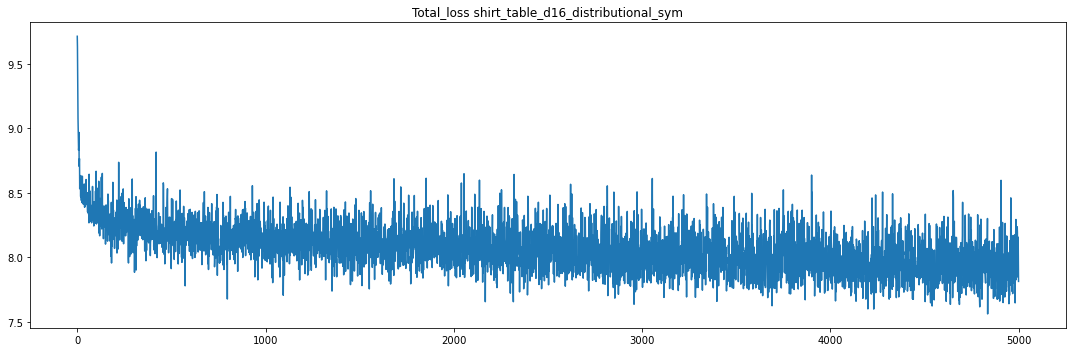

In [5]:
import matplotlib.pyplot as plt

config_filename = os.path.join(logging_dir, name, utils.getPaddedString(num_iterations, width=6) + '_log_history.yaml')
config = utils.getDictFromYamlFilename(config_filename)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
ax.plot(config['train']['total_loss'])
ax.set_title('Total_loss ' + name)
# ax.set_ylim([0, 700])

plt.tight_layout()

## EVAL

got /home/gridsan/aportillo/pytorch-dense-correspondence/pdc/trained_models/tutorials/shirt_table_d16_distributional_sym
output_dir:  /home/gridsan/aportillo/pytorch-dense-correspondence/pdc/trained_models/tutorials/shirt_table_d16_distributional_sym/analysis
train_output_dir:  /home/gridsan/aportillo/pytorch-dense-correspondence/pdc/trained_models/tutorials/shirt_table_d16_distributional_sym/analysis/train
test_output_dir:  /home/gridsan/aportillo/pytorch-dense-correspondence/pdc/trained_models/tutorials/shirt_table_d16_distributional_sym/analysis/test
cross_scene_output_dir: /home/gridsan/aportillo/pytorch-dense-correspondence/pdc/trained_models/tutorials/shirt_table_d16_distributional_sym/analysis/cross_scene

creating necessary dirs
model_param_file 005001.pth


INFO:root:Computing descriptor statistics on dataset
INFO:root:Loading knots info for scene shirt_table


Using SpartanDataset:
   - in train mode
   - number of scenes 1
   - total images:     1500
computing stats
doing dcn eval


INFO:root:Evaluating network on train data
INFO:root:Loading knots info for scene shirt_canonical


done computing stats
computing statistics for image 0 of 100, scene_name shirt_table
scene
computing statistics for image 5 of 100, scene_name shirt_table
scene
computing statistics for image 10 of 100, scene_name shirt_table
scene
computing statistics for image 15 of 100, scene_name shirt_table
scene
computing statistics for image 20 of 100, scene_name shirt_table
scene
computing statistics for image 25 of 100, scene_name shirt_table
scene
computing statistics for image 30 of 100, scene_name shirt_table
scene
computing statistics for image 35 of 100, scene_name shirt_table
scene
computing statistics for image 40 of 100, scene_name shirt_table
scene
computing statistics for image 45 of 100, scene_name shirt_table
scene
computing statistics for image 50 of 100, scene_name shirt_table
scene
computing statistics for image 55 of 100, scene_name shirt_table
scene
computing statistics for image 60 of 100, scene_name shirt_table
scene
computing statistics for image 65 of 100, scene_name shirt

INFO:root:Evaluating network on test data
INFO:root:Loading knots info for scene shirt_table_test


computing statistics for image 0 of 100, scene_name shirt_table_test
scene
computing statistics for image 5 of 100, scene_name shirt_table_test
scene
computing statistics for image 10 of 100, scene_name shirt_table_test
scene
computing statistics for image 15 of 100, scene_name shirt_table_test
scene
computing statistics for image 20 of 100, scene_name shirt_table_test
scene
computing statistics for image 25 of 100, scene_name shirt_table_test
scene
computing statistics for image 30 of 100, scene_name shirt_table_test
scene
computing statistics for image 35 of 100, scene_name shirt_table_test
scene
computing statistics for image 40 of 100, scene_name shirt_table_test
scene
computing statistics for image 45 of 100, scene_name shirt_table_test
scene
computing statistics for image 50 of 100, scene_name shirt_table_test
scene
computing statistics for image 55 of 100, scene_name shirt_table_test
scene
computing statistics for image 60 of 100, scene_name shirt_table_test
scene
computing stat

INFO:root:Making plots
INFO:root:Finished running evaluation on network


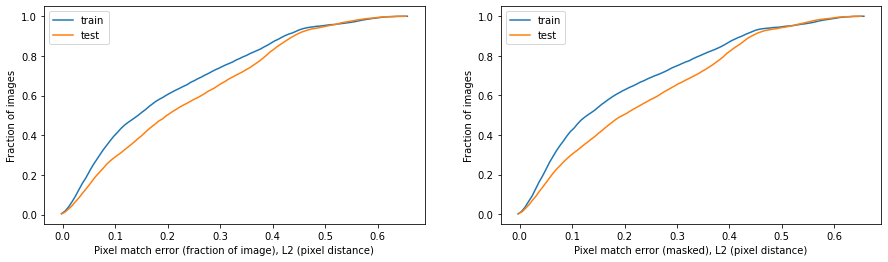

In [6]:
if EVALUATE:
    model_folder = os.path.join(logging_dir, name)
    model_folder = utils.convert_to_absolute_path(model_folder)
    DCE = DenseCorrespondenceEvaluation
    num_image_pairs = 100
    DCE.run_evaluation_on_network(model_folder, num_image_pairs=num_image_pairs)      